
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2024**

---

# Datos y Modelos


In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url ='https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2023_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),680000.0,520000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36,Varón Cis
1,Argentina,Catamarca,Full-Time,Staff (planta permanente),650000.0,520000.0,NaN,NaN,No,No recibo bono,...,Completo,Licenciatura en Sistemas de Información,Universidad Siglo 21,Terminar encuesta,NaN,NaN,NaN,NaN,45,Varón Cis
2,Argentina,Catamarca,Full-Time,Staff (planta permanente),125000.0,104000.0,NaN,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29,Mujer Cis


# Estadística descriptiva

Hemos estado organizando y visualizando los datos de distintas maneras, pero ¿qué intuiciones podemos obtener?

Las visualizaciones como histogramas o gráficos de conteo muestran la cantidad de veces que se observa cada valor en un conjunto de realizaciones de una variable aleatoria. Esto se denomina análisis de frecuencia, y es parte de la **estadística descriptiva**.

El uso de visualizaciones nos limita a estimaciones, pero los datos crudos son demasiado como para intepretarlos en conjunto. Para eso, la estadística descriptiva provee también medidas de tendencia central y de dispersión, que resumen en un valor numérico propiedades de las realizaciones de la variable.

Retomemos el problema original con la v.a. `salary_monthly_NETO`, ¿qué información brindan las siguientes métricas y cómo usarlas?


In [ ]:
salary_col='salary_monthly_BRUTO'
#salary_col='salary_monthly_NETO'

In [ ]:
df[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

count        5805.00
mean       694162.64
std        952623.76
min             1.00
25%        297145.00
50%        493000.00
75%        800000.00
max      45000000.00
Name: salary_monthly_BRUTO, dtype: object

In [ ]:
df[salary_col].mean()

694162.6403750215

## Medidas de tendencia central

Cuando se quiere obtener un valor representativo de todas las realizaciones de una v.a., o su centro, se utiliza una *medida de tendencia central*.

Repasando, dada una característica de interés (modelada por X v.a.) y un conjunto de observaciones $x = \{ x_1, x_2 ... \}$ donde $x_i = X(\omega_i)$ para algún $\omega_i \in \Omega$, y $N = |x|$:

* La **media muestral** (aritmética) o promedio se calcula como:

$$ \bar{x} = \frac{1}{N} \sum_i^N x_i $$

* La **mediana** se calcula:
  1. Ordenar las realizaciones tal que $x_j \leq x_{j+1}$
  2. Si la cantidad de datos $N$ es impar, la mediana es el valor central: $median = x_{\lfloor N / 2 \rfloor +1}$
  3. Si la cantidad de datos $N$ es par, la mediana es e promedio de los dos valores centrales: $median = \frac{1}{2} (x_{ N / 2 } + x_{ (N / 2) +1})$

* La **moda** son los valores o él valor con mayor frecuencia, es decir, los o él que más se repite.


In [ ]:
df[salary_col].mean(), df[salary_col].median()

(363510.54282381485, 256000.0)

**¿Por qué las dos medidas son tan distintas?**

* La media se puede interpretar como el *centro de masa* del histograma. Es decir, si el histograma fuera una figura de madera, el punto de equilibrio donde podemos apoyarlo y no se cae es la media.
* La media es muy sensible a valores extremos.
* La mediana es más robusta a valores extremos.
* Si la distribución de los datos es simétrica, las medidas coinciden. (Luego, si no coinciden es porque la distribución no es simétrica)

**¿Se cumple para estos datos?**

In [ ]:
max_salaries = [df[salary_col].max(), 10**6, 500000, 400000, 300000, 200000]
central_tendency = [
    (max_salary, df[df[salary_col] < max_salary][salary_col].mean(),
     df[df[salary_col] < max_salary][salary_col].median())
    for max_salary in max_salaries
]
central_tendency

[(45000000.0, 686528.9675012061, 492750.0),
 (1000000, 436820.9897232218, 412127.815),
 (500000, 276419.39066564105, 299158.0),
 (400000, 225099.67974775986, 250000.0),
 (300000, 162699.01561869032, 195000.0),
 (200000, 81034.88294422309, 85455.0)]

Se pueden graficar estos números para lograr una mejor intuición de la magnitud de las diferencias. Además, al mostrar una visualización se pueden incluir más puntos.

Para poder crear gráficos de seaborn con distintos grupos de datos, muchas veces es necesario cambiar el formato del dataframe de wide a long. Ver [este link](https://anvil.works/blog/tidy-data) para más información.

In [ ]:
central_tendency_max = [
    (max_salary, df[df[salary_col] < max_salary][salary_col].mean(),
     df[df[salary_col] < max_salary][salary_col].median())
    for max_salary in range(50000, int(df[salary_col].max()), 10**4)
]
central_tendency_max_df = pd.DataFrame(central_tendency_max,
                                   columns=['max_salary', 'mean', 'median'])\
  .melt(id_vars='max_salary', var_name='metric')

central_tendency_max_df[:3]

,max_salary,metric,value
0,50000,mean,2803.620751
1,60000,mean,3652.854302
2,70000,mean,5321.302506


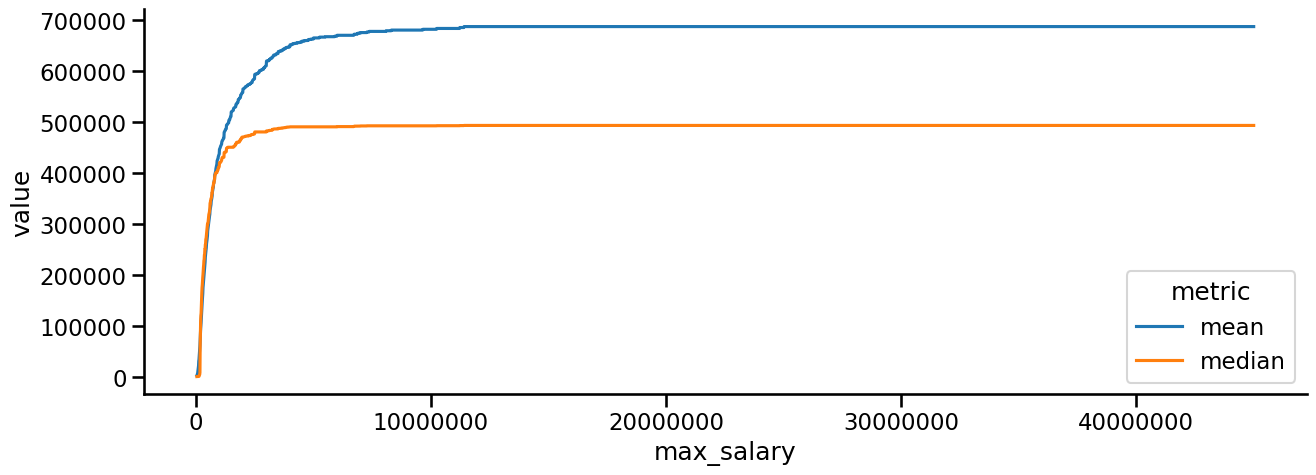

In [ ]:
# ¡Podemos ver estos datos visualmente! valga la redundancia!!
fig = plt.figure(figsize=(15, 5))
seaborn.lineplot(data=central_tendency_max_df, x='max_salary', y='value', hue='metric')
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

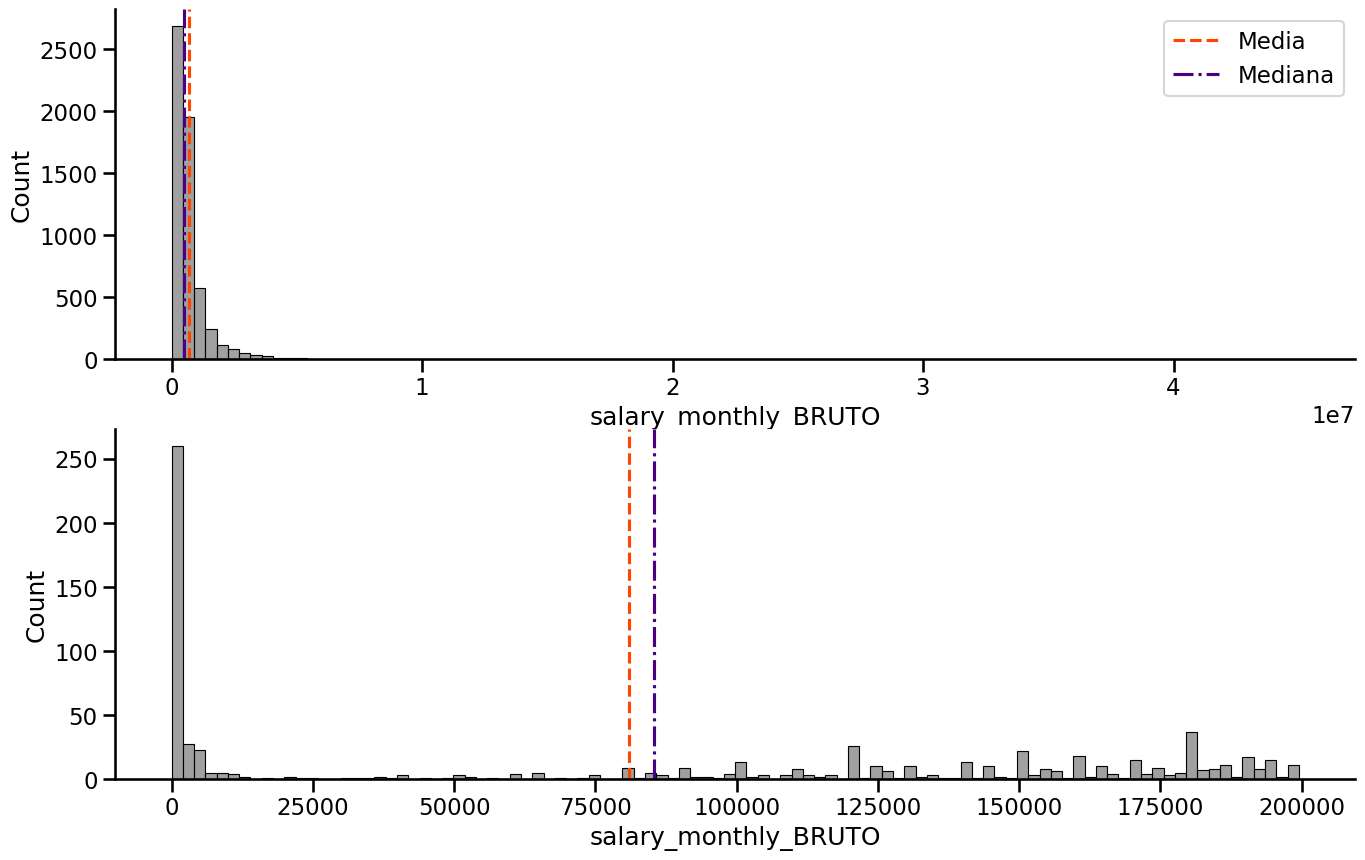

In [ ]:
## La diferencia no siempre se aprecia en los gráficos
fig, axes = plt.subplots(nrows=2, figsize=(16, 10))

seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')


filtered_df = df[df[salary_col] < 200000]
seaborn.histplot(filtered_df[salary_col], bins=100, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

¿Qué decir de la moda?

In [ ]:
df.profile_gender.mode()

0    Varón Cis
Name: profile_gender, dtype: object

In [ ]:
df.profile_gender.describe()

count          5805
unique          144
top       Varón Cis
freq           4148
Name: profile_gender, dtype: object

In [ ]:
df.profile_age.describe()

count    5805.000000
mean       34.244789
std        11.276864
min        18.000000
25%        28.000000
50%        33.000000
75%        39.000000
max       455.000000
Name: profile_age, dtype: float64

## Medidas de dispersión

Las medidas de dispersión vistas en el teórico son la desviación estándar, la varianza, y el coeficiente de variación. También permiten representar con un número alguna propiedad de los datos.

Por ejemplo, comparemos el salario neto con el salario bruto. A priori, **¿deberíamos ver alguna diferencia?**

In [ ]:
df[['salary_monthly_NETO', 'salary_monthly_BRUTO']].describe().round()

,salary_monthly_NETO,salary_monthly_BRUTO
count,5566.0,5805.0
mean,567173.0,694163.0
std,958643.0,952624.0
min,1.0,1.0
25%,250000.0,297145.0
50%,400728.0,493000.0
75%,600000.0,800000.0
max,45000000.0,45000000.0


Claramente, ambas distribuciones están centradas en valores distintos, pero ¿podemos decir algo sobre su dispersión?

Cuando se comparan dos características diferentes (que pueden tener magnitudes diferentes) puede no ser conveniente comparar directamente los valores de las desviaciones estándar, sino que podemos usar el coeficiente de variación (desviación estándar dividida la media).

In [ ]:
import scipy

print("Coeficiente de variación salario bruto",
      scipy.stats.variation(df.salary_monthly_BRUTO))
print("Coeficiente de variación salario neto",
      scipy.stats.variation(df.salary_monthly_NETO.dropna()))

Coeficiente de variación salario bruto 1.3722168913679016
Coeficiente de variación salario neto 1.690060496598756


## Percentiles y gráficos de caja

Los gráficos de caja son otra forma de representar la distribución de las realizaciones de una v.a. numérica, de una forma más condensada que un histograma.

Son muy útiles para comparar muchas distribuciones, pero sólo cuando son muy distintas entre ellas, ya que oscurecen algunas sutilezas. Otros problema de este tipo de gráficos es que *no todo el mundo recuerda cómo leerlos*.

En estadística descriptiva, un gráfico de caja es un método para representar gráficamente grupos de datos numéricos a través de sus cuartiles. Los gráficos de caja también pueden tener líneas que se extienden verticalmente desde las cajas (bigotes) indicando la variabilidad fuera de los cuartiles superior e inferior. Los valores atípicos pueden representarse como puntos individuales.

La definición anterior sugiere que, si hay un valor atípico, se representará como un punto en el diagrama de caja, mientras que el resto de los datos de la muestra se agrupará y se mostrará en forma de cajas. Intentemos verlo nosotros mismos.
<center>
<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" height="300" />
</center>

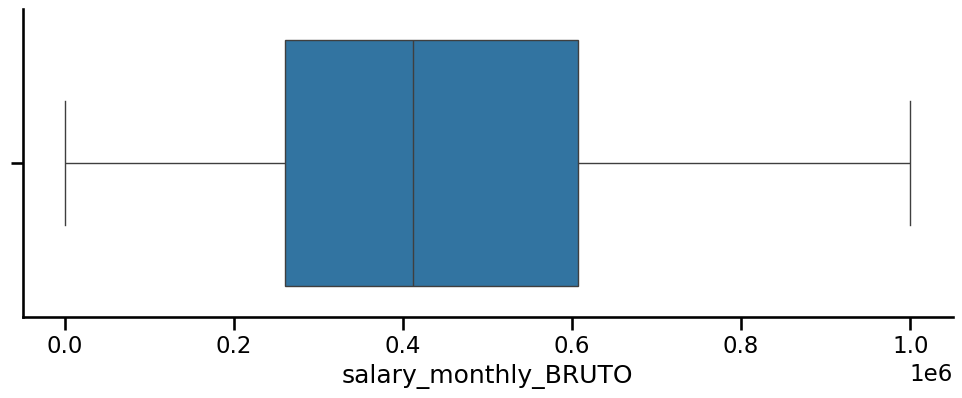

In [ ]:

plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[df[salary_col]<1000000][salary_col])
seaborn.despine()

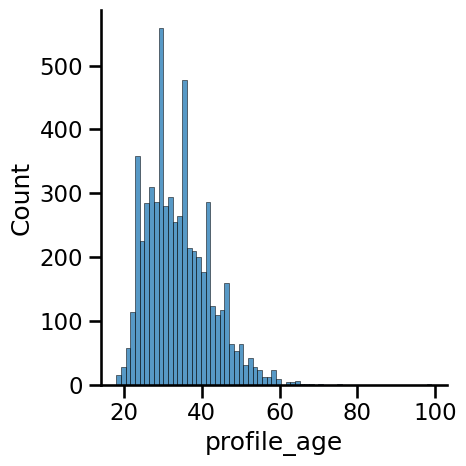

In [ ]:
seaborn.displot(x=df[df.profile_age < 100].profile_age)

<Axes: xlabel='profile_age'>

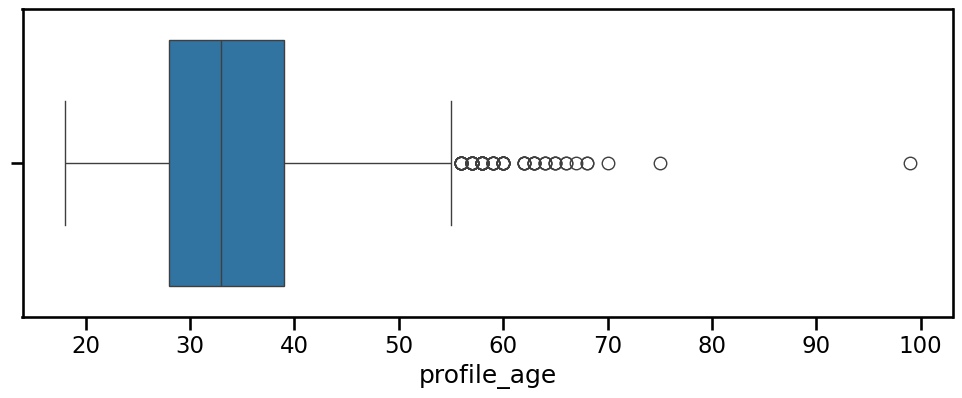

In [ ]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[df.profile_age < 100].profile_age)

Por ejemplo, podemos comparar la distribución de los salarios netos con respecto al nivel de estudios alcanzado.

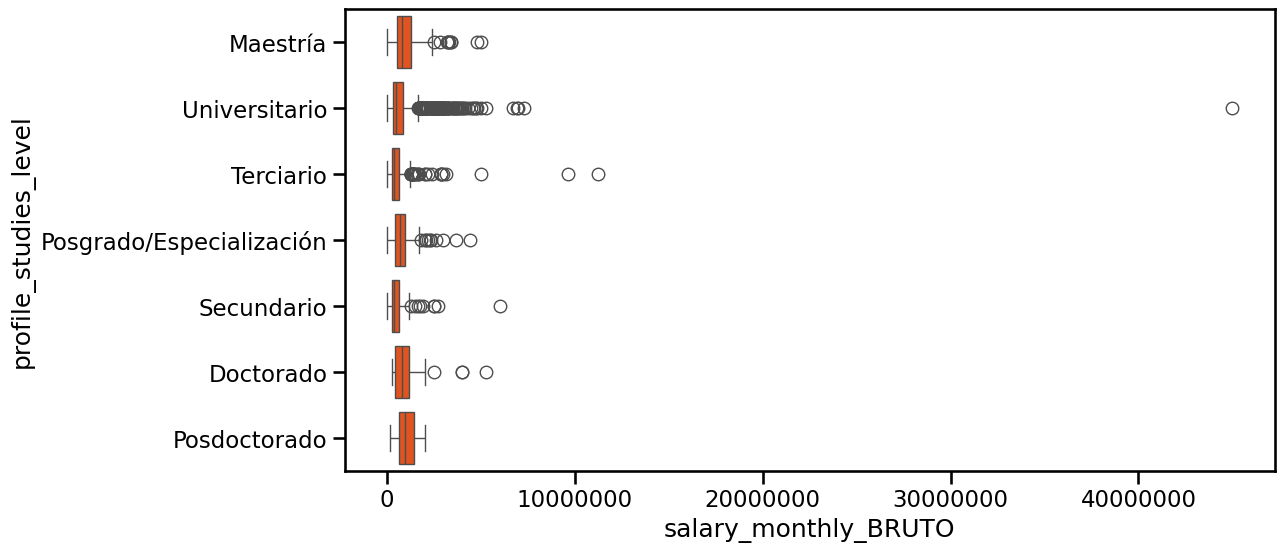

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
df['profile_studies_level'].describe()

count              2613
unique                7
top       Universitario
freq               1750
Name: profile_studies_level, dtype: object

### Boxenplots

Los boxplots tienen una gran desventaja: ocultan mucha información en la distribución de las colas. Por ejemplo, para la categoría Posdoctorado, sabemos que el 25% de los valores de sueldo neto es mayor que los ~650000 pesos. Pero no conocemos cómo se distribuyen. Para conjuntos de datos de gran tamaño, el 25% de los datos contiene mucha información.

Un gráfico más informativo es el **boxenplot**, que visualiza más percentiles. Otra ventaja es la percepción del mismo debido al peso visual de las cajas: los datos en el rango intercuartílico no parecen muuuucho más importantes que los datos en las colas.

Sin embargo, es aún más difícil de leer si buscamos exactitud, ya que los percentiles que definen el límite de cada caja se definen recursivamente y no decrecen linealmente.
Tarea: averiguar en que cosisten

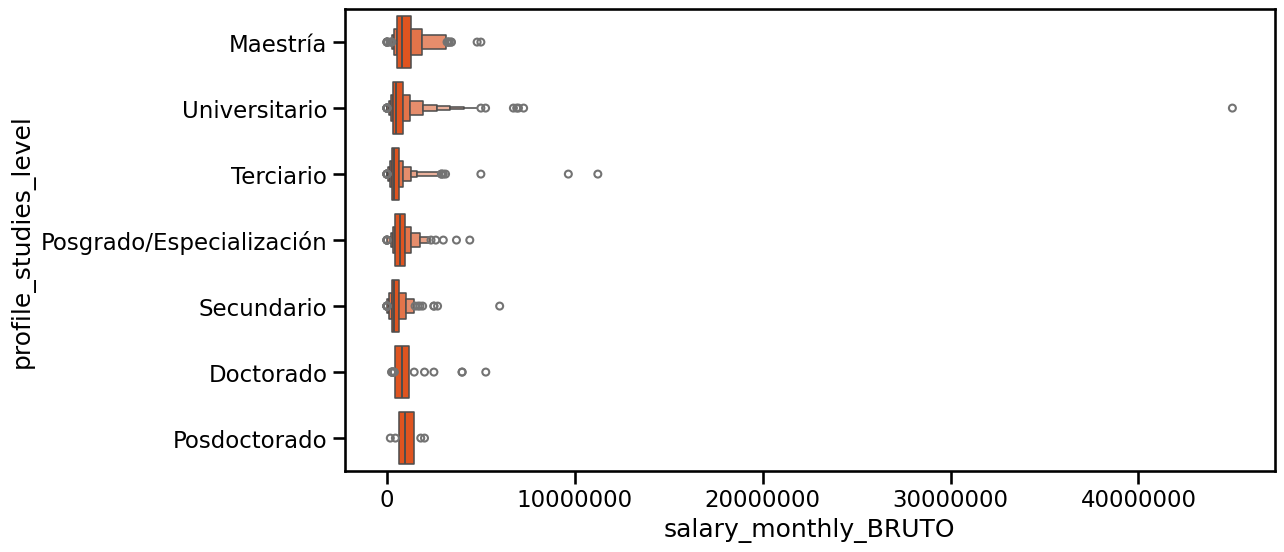

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

## Eliminación de valores extremos

### Usando percentiles

Una forma conservadora de eliminar valores extremos que estén afectando a la media, el rango y las visualizaciones es seleccionar un cierto porcentaje más extremo. Para eso, usamos los percentiles.

Por ejemplo, podemos elegir quedarnos con el 99% de salarios más bajos, eliminando el 1%. Podemos calcular todos los percentiles para decidir cuál sería el más apropiado.

In [ ]:
k = 90
percentile_90 = df[salary_col].quantile(k / 100)
n_below = len(df[df[salary_col] < percentile_90])
n_above = len(df[df[salary_col] > percentile_90])
print('Percentil {} de la columna {}: {}'.format(k, salary_col, percentile_90))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(df)))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(df)))

Percentil 90 de la columna salary_monthly_BRUTO: 1372400.0000000014
% de datos menor que percentil 90: 0.8999138673557279
% de datos mayor que percentil 90: 0.10008613264427219


In [ ]:
df[salary_col].quantile([.95, .98, .99, .995, .998])

0.950    1977987.60
0.980    3000000.00
0.990    3693043.20
0.995    4500000.00
0.998    6781300.48
Name: salary_monthly_BRUTO, dtype: float64

<Axes: xlabel='salary_monthly_BRUTO'>

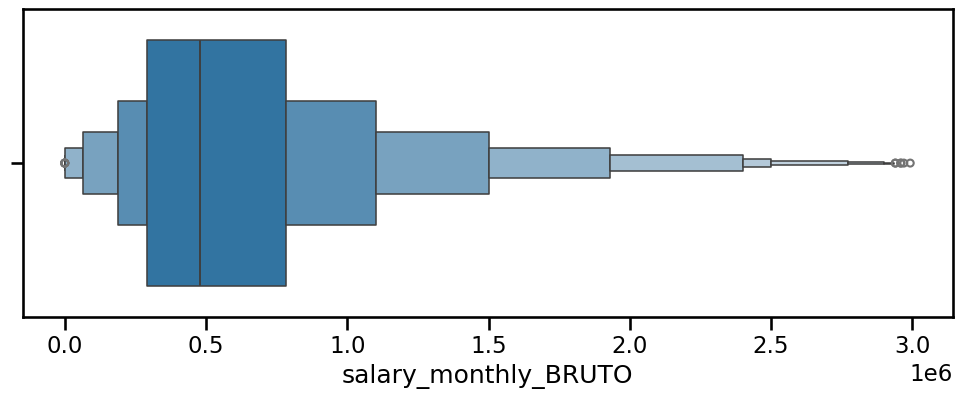

In [ ]:
plt.figure(figsize=(12, 4))
max_limit = df[salary_col].quantile(.98)
seaborn.boxenplot( x=df[df[salary_col] < max_limit][salary_col])

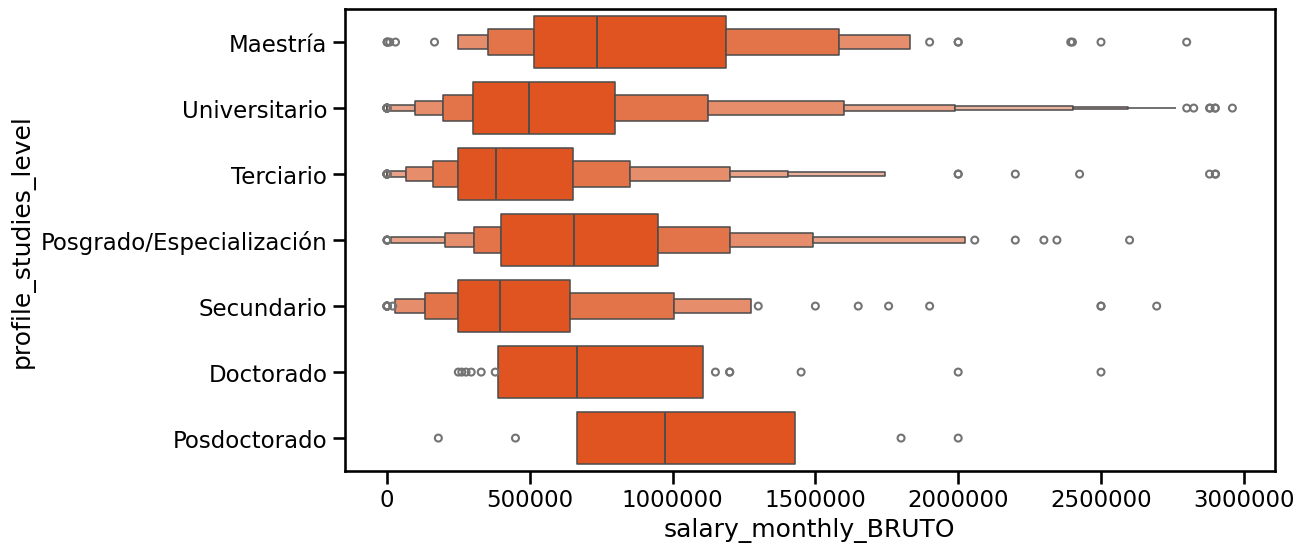

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=df, x=df[df[salary_col] < max_limit][salary_col], y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

<Axes: xlabel='salary_monthly_BRUTO'>

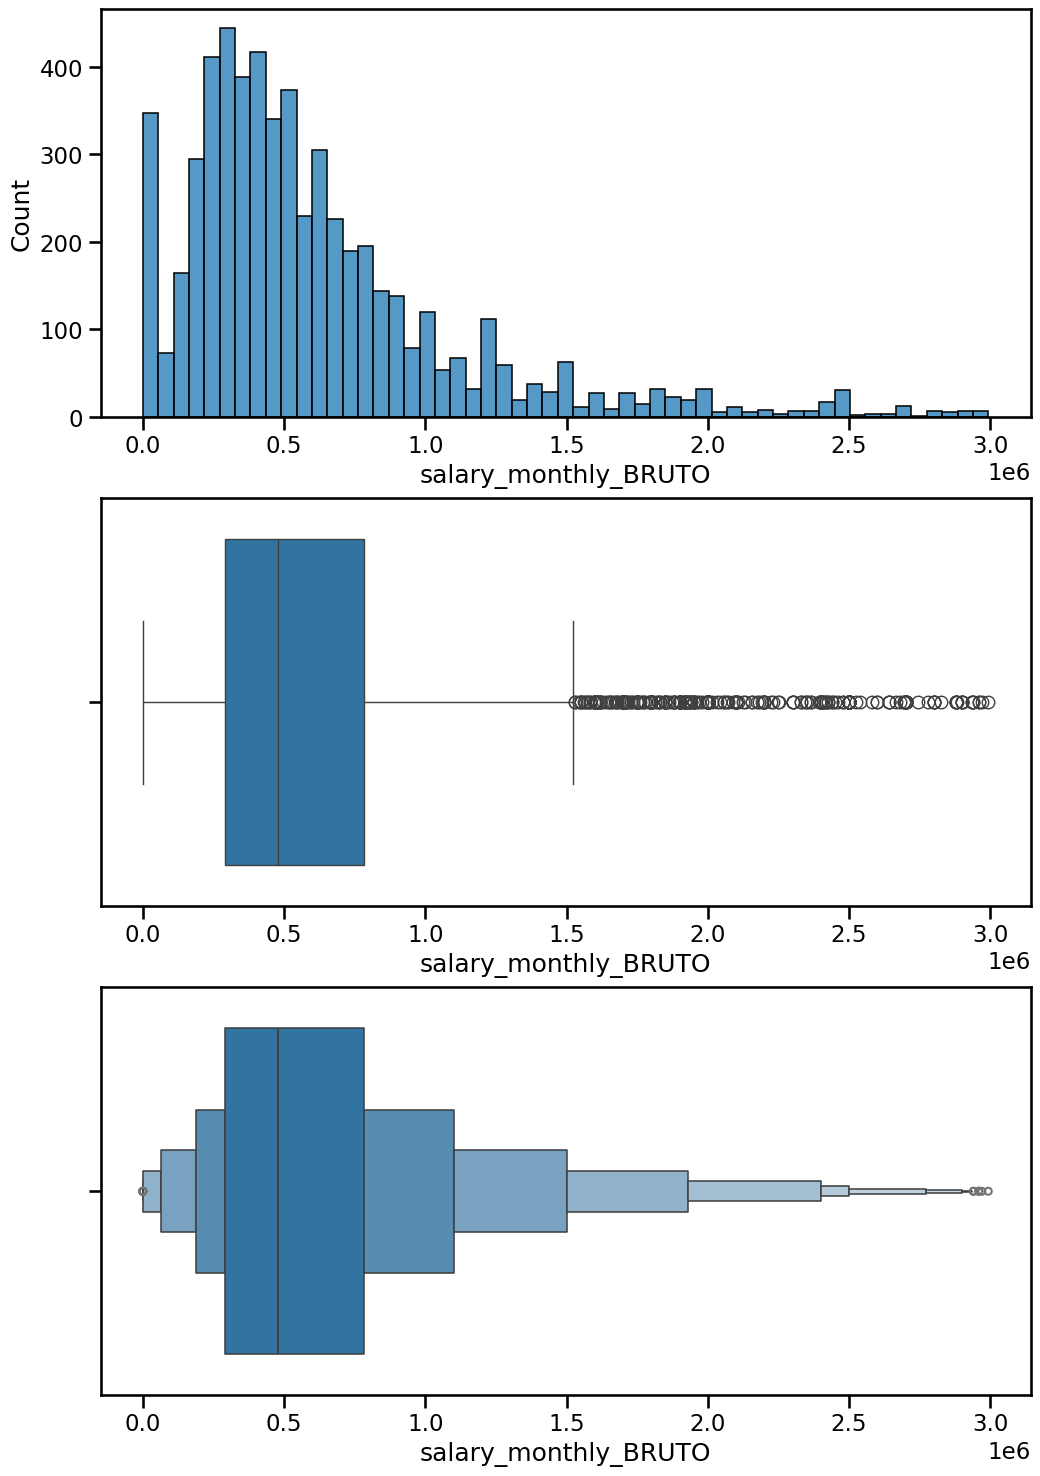

In [ ]:
fig, axes = plt.subplots(figsize=(12, 18), nrows=3)
max_limit = df[salary_col].quantile(.98)
data = df[df[salary_col] < max_limit][salary_col]
seaborn.histplot(x=data, ax=axes[0])
seaborn.boxplot(x=data, ax=axes[1])
seaborn.boxenplot(x=data, ax=axes[2])

### Rango itercuartílico

In [ ]:
def clean_outliers_q3(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
    return dataset[mask_outlier]

<Axes: xlabel='salary_monthly_BRUTO', ylabel='Count'>

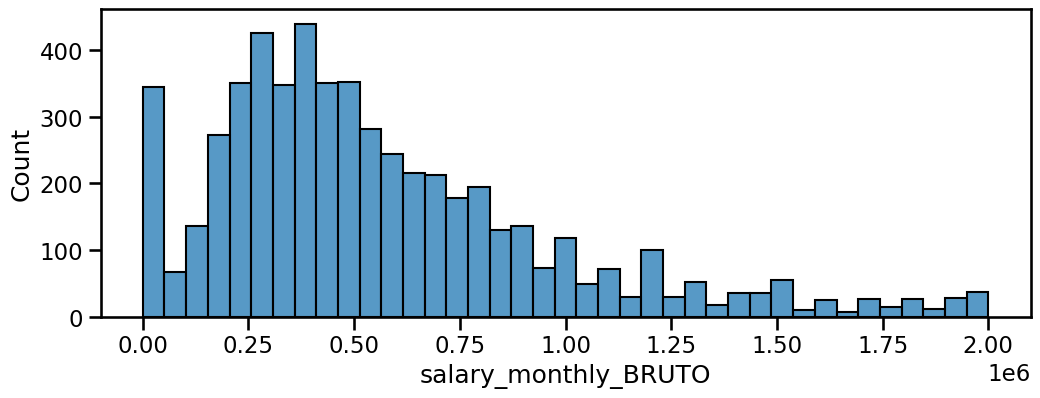

In [ ]:
fig = plt.figure(figsize=(12, 4))
data = clean_outliers_q3(df, salary_col)[salary_col]
seaborn.histplot(x=data)

In [ ]:
def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <=
        (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

<Axes: xlabel='salary_monthly_BRUTO', ylabel='Count'>

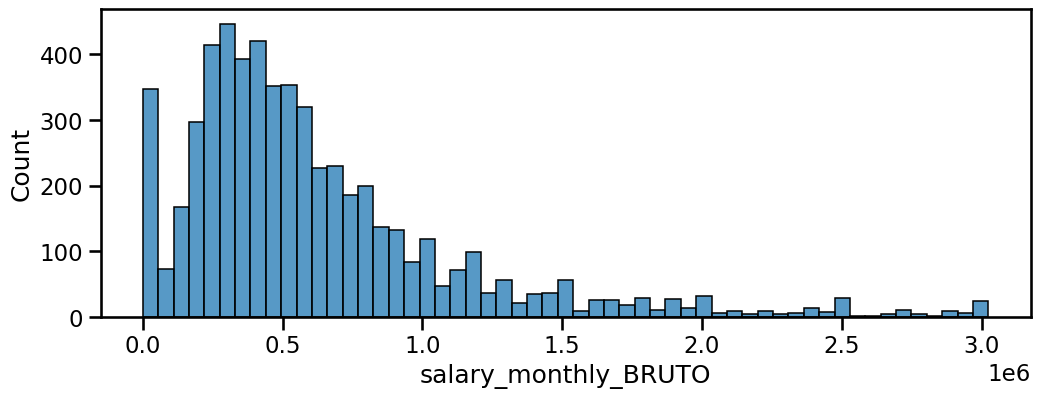

In [ ]:
fig = plt.figure(figsize=(12, 4))
data = clean_outliers_sd(df, salary_col)[salary_col]
seaborn.histplot(x=data)

### ¡Mirando los datos!

¿Quiénes son los que cobran tanto?

In [ ]:
len(df[df[salary_col] > df[salary_col].quantile(0.98)])

104

In [ ]:
df_filtrada=df[df[salary_col] > df[salary_col].quantile(0.98)]
df[df[salary_col] > df[salary_col].quantile(0.98)]


,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,profile_studies_level_state,profile_career,Institución educativa,¿Salir o seguir contestando sobre las guardias?,work_on_call_duty,salary_on_call_duty_charge,Aclará el número que ingresaste en el campo anterior,¿Salir o seguir contestando sobre estudios?,profile_age,profile_gender
55,Argentina,Chubut,Full-Time,Contractor,3173016.0,3173016.0,Cobro todo el salario en dólares,476,No,No recibo bono,...,En curso,Ingeniería en Sistemas de Información,UNICEN - Universidad Nacional del Centro de la...,Responder sobre guardias,No,0.0,Porcentaje de mi sueldo bruto,Terminar encuesta,35,Varón Cis
168,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,3500000.0,3500000.0,Cobro todo el salario en dólares,490,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43,Varón Cis
288,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,3600000.0,3590000.0,Cobro todo el salario en dólares,488,No,No recibo bono,...,Incompleto,Licenciatura en Ciencias de la Computación,UBA - Universidad de Buenos Aires,Responder sobre guardias,No,0.0,Porcentaje de mi sueldo bruto,Terminar encuesta,36,Agénero
374,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,6860000.0,6860000.0,Cobro todo el salario en dólares,490,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46,Prefiero no decir
394,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,4900000.0,4500000.0,Cobro todo el salario en dólares,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,Varón Cis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5422,Argentina,Santa Fe,Full-Time,Contractor,4226000.0,NaN,Cobro todo el salario en dólares,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42,Varón Cis
5454,Argentina,Santa Fe,Full-Time,Contractor,45000000.0,45000000.0,Cobro todo el salario en dólares,481,No,No recibo bono,...,Incompleto,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,Terminar encuesta,"Sí, pasiva",528000.0,Porcentaje de mi sueldo bruto,Responder sobre mis estudios,48,Varón Cis
5636,Argentina,Santa Fe,Full-Time,Contractor,3500000.0,3400000.0,Cobro todo el salario en dólares,495,Menos de un sueldo,Performance individual,...,Completo,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,Terminar encuesta,NaN,NaN,NaN,NaN,36,Varón Cis
5657,Argentina,Santa Fe,Full-Time,Contractor,4000000.0,4000000.0,Cobro todo el salario en dólares,NaN,No,No recibo bono,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,Varón Cis
